In [1]:
text = "This is the text I would like to chunk up. It is the example text for this exercise"

In [2]:
# Create a list that will hold your chunks
chunks = []

chunk_size = 35 # Characters

# Run through the a range with the length of your text and iterate every chunk_size you want
for i in range(0, len(text), chunk_size):
    chunk = text[i:i + chunk_size]
    chunks.append(chunk)
chunks

['This is the text I would like to ch',
 'unk up. It is the example text for ',
 'this exercise']

In [3]:
from langchain.text_splitter import CharacterTextSplitter

In [4]:
text_splitter = CharacterTextSplitter(chunk_size = 35, chunk_overlap=0, separator='', strip_whitespace=False)

In [5]:
text_splitter.create_documents([text])

[Document(metadata={}, page_content='This is the text I would like to ch'),
 Document(metadata={}, page_content='unk up. It is the example text for '),
 Document(metadata={}, page_content='this exercise')]

In [6]:
text_splitter = CharacterTextSplitter(chunk_size = 35, chunk_overlap=0, separator='', strip_whitespace=True)

In [7]:
text_splitter.create_documents([text])

[Document(metadata={}, page_content='This is the text I would like to ch'),
 Document(metadata={}, page_content='unk up. It is the example text for'),
 Document(metadata={}, page_content='this exercise')]

In [8]:
text_splitter = CharacterTextSplitter(chunk_size = 35, chunk_overlap=4, separator='')

In [9]:
text_splitter.create_documents([text])

[Document(metadata={}, page_content='This is the text I would like to ch'),
 Document(metadata={}, page_content='o chunk up. It is the example text'),
 Document(metadata={}, page_content='ext for this exercise')]

In [10]:
text_splitter = CharacterTextSplitter(chunk_size = 35, chunk_overlap=0, separator='ch')

In [11]:
text_splitter.create_documents([text])

[Document(metadata={}, page_content='This is the text I would like to'),
 Document(metadata={}, page_content='unk up. It is the example text for this exercise')]

In [12]:
from llama_index.core.text_splitter import SentenceSplitter
from llama_index.core import SimpleDirectoryReader

In [13]:
splitter = SentenceSplitter(
    chunk_size=200,
    chunk_overlap=15,
)

In [14]:
documents = SimpleDirectoryReader(
    input_files=["mit.txt"]
).load_data()

In [15]:
nodes = splitter.get_nodes_from_documents(documents)

In [16]:
nodes[0]

TextNode(id_='93040f24-f1bb-407d-96a6-edd318540a62', embedding=None, metadata={'file_path': 'mit.txt', 'file_name': 'mit.txt', 'file_type': 'text/plain', 'file_size': 36045, 'creation_date': '2025-10-12', 'last_modified_date': '2025-10-12'}, excluded_embed_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], excluded_llm_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], relationships={<NodeRelationship.SOURCE: '1'>: RelatedNodeInfo(node_id='2fe22ac6-a0b6-451d-b813-9e8dfc9ad8a6', node_type=<ObjectType.DOCUMENT: '4'>, metadata={'file_path': 'mit.txt', 'file_name': 'mit.txt', 'file_type': 'text/plain', 'file_size': 36045, 'creation_date': '2025-10-12', 'last_modified_date': '2025-10-12'}, hash='a2e9e1df69aeaebd22c84e272fcf3b7f1c607a7093059cc05888a106b0c0efbb'), <NodeRelationship.NEXT: '3'>: RelatedNodeInfo(node_id='9cf13abb-988e-4b73-a36b-4f7c68a2272a', node_typ

In [17]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

In [18]:
text = """
One of the most important things I didn't understand about the world when I was a child is the degree to which the returns for performance are superlinear.

Teachers and coaches implicitly told us the returns were linear. "You get out," I heard a thousand times, "what you put in." They meant well, but this is rarely true. If your product is only half as good as your competitor's, you don't get half as many customers. You get no customers, and you go out of business.

It's obviously true that the returns for performance are superlinear in business. Some think this is a flaw of capitalism, and that if we changed the rules it would stop being true. But superlinear returns for performance are a feature of the world, not an artifact of rules we've invented. We see the same pattern in fame, power, military victories, knowledge, and even benefit to humanity. In all of these, the rich get richer. [1]
"""

In [19]:
text_splitter = RecursiveCharacterTextSplitter(chunk_size = 65, chunk_overlap=0)

In [20]:
text_splitter.create_documents([text])

[Document(metadata={}, page_content="One of the most important things I didn't understand about the"),
 Document(metadata={}, page_content='world when I was a child is the degree to which the returns for'),
 Document(metadata={}, page_content='performance are superlinear.'),
 Document(metadata={}, page_content='Teachers and coaches implicitly told us the returns were linear.'),
 Document(metadata={}, page_content='"You get out," I heard a thousand times, "what you put in." They'),
 Document(metadata={}, page_content='meant well, but this is rarely true. If your product is only'),
 Document(metadata={}, page_content="half as good as your competitor's, you don't get half as many"),
 Document(metadata={}, page_content='customers. You get no customers, and you go out of business.'),
 Document(metadata={}, page_content="It's obviously true that the returns for performance are"),
 Document(metadata={}, page_content='superlinear in business. Some think this is a flaw of'),
 Document(metadata=

In [21]:
text_splitter = RecursiveCharacterTextSplitter(chunk_size = 450, chunk_overlap=0)
text_splitter.create_documents([text])

[Document(metadata={}, page_content="One of the most important things I didn't understand about the world when I was a child is the degree to which the returns for performance are superlinear."),
 Document(metadata={}, page_content='Teachers and coaches implicitly told us the returns were linear. "You get out," I heard a thousand times, "what you put in." They meant well, but this is rarely true. If your product is only half as good as your competitor\'s, you don\'t get half as many customers. You get no customers, and you go out of business.'),
 Document(metadata={}, page_content="It's obviously true that the returns for performance are superlinear in business. Some think this is a flaw of capitalism, and that if we changed the rules it would stop being true. But superlinear returns for performance are a feature of the world, not an artifact of rules we've invented. We see the same pattern in fame, power, military victories, knowledge, and even benefit to humanity. In all of these, th

In [22]:
from langchain.text_splitter import MarkdownTextSplitter

In [23]:
splitter = MarkdownTextSplitter(chunk_size = 40, chunk_overlap=0)

In [24]:
markdown_text = """
# Fun in California

## Driving

Try driving on the 1 down to San Diego

### Food

Make sure to eat a burrito while you're there

## Hiking

Go to Yosemite
"""

In [25]:
splitter.create_documents([markdown_text])

[Document(metadata={}, page_content='# Fun in California\n\n## Driving'),
 Document(metadata={}, page_content='Try driving on the 1 down to San Diego'),
 Document(metadata={}, page_content='### Food'),
 Document(metadata={}, page_content="Make sure to eat a burrito while you're"),
 Document(metadata={}, page_content='there'),
 Document(metadata={}, page_content='## Hiking\n\nGo to Yosemite')]

In [26]:
from langchain.text_splitter import PythonCodeTextSplitter

In [27]:
python_text = """
class Person:
  def __init__(self, name, age):
    self.name = name
    self.age = age

p1 = Person("John", 36)

for i in range(10):
    print (i)
"""

In [28]:
python_splitter = PythonCodeTextSplitter(chunk_size=100, chunk_overlap=0)

In [29]:
python_splitter.create_documents([python_text])

[Document(metadata={}, page_content='class Person:\n  def __init__(self, name, age):\n    self.name = name\n    self.age = age'),
 Document(metadata={}, page_content='p1 = Person("John", 36)\n\nfor i in range(10):\n    print (i)')]

In [30]:
from langchain.text_splitter import RecursiveCharacterTextSplitter, Language

In [31]:
javascript_text = """
// Function is called, the return value will end up in x
let x = myFunction(4, 3);

function myFunction(a, b) {
// Function returns the product of a and b
  return a * b;
}
"""

In [32]:
js_splitter = RecursiveCharacterTextSplitter.from_language(
    language=Language.JS, chunk_size=65, chunk_overlap=0
)

In [33]:
js_splitter.create_documents([javascript_text])

[Document(metadata={}, page_content='// Function is called, the return value will end up in x'),
 Document(metadata={}, page_content='let x = myFunction(4, 3);'),
 Document(metadata={}, page_content='function myFunction(a, b) {'),
 Document(metadata={}, page_content='// Function returns the product of a and b\n  return a * b;\n}')]

In [34]:
import os
from unstructured.partition.pdf import partition_pdf
from unstructured.staging.base import elements_to_json

In [35]:
filename = "SalesforceFinancial.pdf"

# Extracts the elements from the PDF
elements = partition_pdf(
    filename=filename,

    # Unstructured Helpers
    strategy="hi_res", 
    infer_table_structure=True, 
    model_name="yolox"
)

The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.


In [36]:
elements

In [37]:
elements[-5].metadata.text_as_html

'<table><thead><tr><th>Revenue)</th><th>Guidance $7.69 - $7.70 Billion</th><th>Guidance $31.7 - $31.8 Billion</th></tr></thead><tbody><tr><td>Y/Y Growth</td><td>~21%</td><td>~20%</td></tr><tr><td>FX Impact?)</td><td>~($200M) y/y FX</td><td>~($600M) y/y FX®</td></tr><tr><td>GAAP operating margin</td><td>N/A</td><td>~3.8%</td></tr><tr><td>Non-GAAP operating margin)</td><td>N/A</td><td>~20.4%</td></tr><tr><td>GAAP earnings (loss) per share</td><td>($0.03) - ($0.02)</td><td>$0.38 - $0.40</td></tr><tr><td>Non-GAAP earnings per share</td><td>$1.01 - $1.02</td><td>$4.74 - $4.76</td></tr><tr><td>Operating Cash Flow Growth (Y/Y)</td><td>N/A</td><td>~21% - 22%</td></tr><tr><td>Current Remaining Performance Obligation Growth (Y/Y)</td><td>~15%</td><td>N/A</td></tr></tbody></table>'

In [38]:
elements[0].text

'year. Professional services and other revenues for the quarter were $0.56 billion, an increase of 30% year-over- year.'

In [39]:
from typing import Any

from pydantic import BaseModel
from unstructured.partition.pdf import partition_pdf

In [40]:
filepath = "VisualInstruction.pdf"

In [41]:
# Get elements
raw_pdf_elements = partition_pdf(
    filename=filepath,
    
    # Using pdf format to find embedded image blocks
    extract_images_in_pdf=True,
    
    # Use layout model (YOLOX) to get bounding boxes (for tables) and find titles
    # Titles are any sub-section of the document
    infer_table_structure=True,
    
    # Post processing to aggregate text once we have the title
    chunking_strategy="by_title",
    # Chunking params to aggregate text blocks
    # Attempt to create a new chunk 3800 chars
    # Attempt to keep chunks > 2000 chars
    # Hard max on chunks
    max_characters=4000,
    new_after_n_chars=3800,
    combine_text_under_n_chars=2000,
    image_output_dir_path="static/pdfImages/",
)

In [42]:
from langchain.chat_models import ChatOpenAI
from langchain.schema.messages import HumanMessage
import os
from dotenv import load_dotenv
from PIL import Image
import base64
import io

# load_dotenv()

In [43]:
# Function to convert image to base64
def image_to_base64(image_path):
    with Image.open(image_path) as image:
        buffered = io.BytesIO()
        image.save(buffered, format=image.format)
        img_str = base64.b64encode(buffered.getvalue())
        return img_str.decode('utf-8')

image_str = image_to_base64("figures/figure-15-4.jpg")

In [ ]:
chat = ChatOpenAI(model="gpt-4.1-mini",
                  max_tokens=1024,openai_api_key="...")

msg = chat.invoke(
    [
        HumanMessage(
            content=[
                {"type": "text", "text" : "Please give a summary of the image provided. Be descriptive"},
                {
                    "type": "image_url",
                    "image_url": {
                        "url": f"data:image/jpeg;base64,{image_str}"
                    },
                },
            ]
        )
    ]
)

In [45]:
msg.content

'The image shows a baking tray with several pieces of fried chicken arranged in a way that resembles a rough map of the world. The chicken pieces are placed to mimic the shapes and relative positions of the continents, with distinct clusters representing North America, South America, Europe, Africa, Asia, and Australia. Above the tray, there is a caption that reads, "how beautiful it all is." The overall effect is a humorous and creative comparison of fried chicken pieces to a world map.'

In [46]:
with open("mit.txt") as file:
    essay = file.read()

In [47]:
import re

# Splitting the essay on '.', '?', and '!'
single_sentences_list = re.split(r'(?<=[.?!])\s+', essay)
print (f"{len(single_sentences_list)} senteneces were found")

317 senteneces were found


In [48]:
sentences = [{'sentence': x, 'index' : i} for i, x in enumerate(single_sentences_list)]
sentences[:3]

[{'sentence': '\n\nWant to start a startup?', 'index': 0},
 {'sentence': 'Get funded by\nY Combinator.', 'index': 1},
 {'sentence': 'October 2006(This essay is derived from a talk at MIT.)\nTill recently graduating seniors had two choices: get a job or go\nto grad school.',
  'index': 2}]

In [49]:
def combine_sentences(sentences, buffer_size=1):
    # Go through each sentence dict
    for i in range(len(sentences)):
        # Create a string that will hold the sentences which are joined
        combined_sentence = ''

        # Add sentences before the current one, based on the buffer size.
        for j in range(i - buffer_size, i):
            # Check if the index j is not negative (to avoid index out of range like on the first one)
            if j >= 0:
                # Add the sentence at index j to the combined_sentence string
                combined_sentence += sentences[j]['sentence'] + ' '

        # Add the current sentence
        combined_sentence += sentences[i]['sentence']

        # Add sentences after the current one, based on the buffer size
        for j in range(i + 1, i + 1 + buffer_size):
            # Check if the index j is within the range of the sentences list
            if j < len(sentences):
                # Add the sentence at index j to the combined_sentence string
                combined_sentence += ' ' + sentences[j]['sentence']

        # Then add the whole thing to your dict
        # Store the combined sentence in the current sentence dict
        sentences[i]['combined_sentence'] = combined_sentence

    return sentences

sentences = combine_sentences(sentences)

In [50]:
sentences[:3]

[{'sentence': '\n\nWant to start a startup?',
  'index': 0,
  'combined_sentence': '\n\nWant to start a startup? Get funded by\nY Combinator.'},
 {'sentence': 'Get funded by\nY Combinator.',
  'index': 1,
  'combined_sentence': '\n\nWant to start a startup? Get funded by\nY Combinator. October 2006(This essay is derived from a talk at MIT.)\nTill recently graduating seniors had two choices: get a job or go\nto grad school.'},
 {'sentence': 'October 2006(This essay is derived from a talk at MIT.)\nTill recently graduating seniors had two choices: get a job or go\nto grad school.',
  'index': 2,
  'combined_sentence': 'Get funded by\nY Combinator. October 2006(This essay is derived from a talk at MIT.)\nTill recently graduating seniors had two choices: get a job or go\nto grad school. I think there will increasingly be a third option:\nto start your own startup.'}]

In [107]:
from langchain.embeddings import OpenAIEmbeddings
oaiembeds = OpenAIEmbeddings(openai_api_key="...")

In [52]:
embeddings = oaiembeds.embed_documents([x['combined_sentence'] for x in sentences])

In [53]:
for i, sentence in enumerate(sentences):
    sentence['combined_sentence_embedding'] = embeddings[i]

In [54]:
from sklearn.metrics.pairwise import cosine_similarity

def calculate_cosine_distances(sentences):
    distances = []
    for i in range(len(sentences) - 1):
        embedding_current = sentences[i]['combined_sentence_embedding']
        embedding_next = sentences[i + 1]['combined_sentence_embedding']
        
        # Calculate cosine similarity
        similarity = cosine_similarity([embedding_current], [embedding_next])[0][0]
        
        # Convert to cosine distance
        distance = 1 - similarity

        # Append cosine distance to the list
        distances.append(distance)

        # Store distance in the dictionary
        sentences[i]['distance_to_next'] = distance

    # Optionally handle the last sentence
    # sentences[-1]['distance_to_next'] = None  # or a default value

    return distances, sentences

In [55]:
distances, sentences = calculate_cosine_distances(sentences)

In [56]:
distances[:3]

[np.float64(0.08178949578121497),
 np.float64(0.027307362060605356),
 np.float64(0.04732032956852439)]

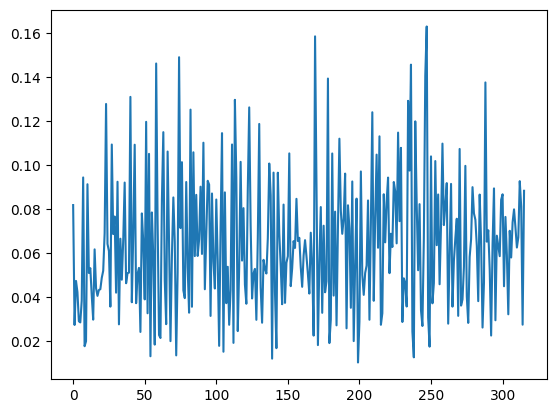

In [57]:
import matplotlib.pyplot as plt

plt.plot(distances)

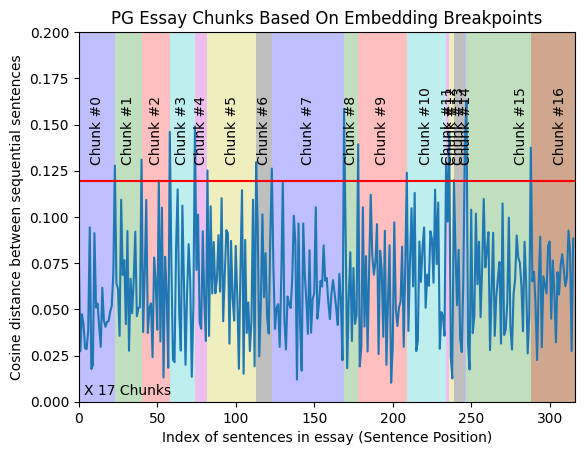

In [58]:
import numpy as np

plt.plot(distances);

y_upper_bound = .2
plt.ylim(0, y_upper_bound)
plt.xlim(0, len(distances))

# We need to get the distance threshold that we'll consider an outlier
# We'll use numpy .percentile() for this
breakpoint_percentile_threshold = 95
breakpoint_distance_threshold = np.percentile(distances, breakpoint_percentile_threshold) # If you want more chunks, lower the percentile cutoff
plt.axhline(y=breakpoint_distance_threshold, color='r', linestyle='-');

# Then we'll see how many distances are actually above this one
num_distances_above_theshold = len([x for x in distances if x > breakpoint_distance_threshold]) # The amount of distances above your threshold
plt.text(x=(len(distances)*.01), y=y_upper_bound/50, s=f"X {num_distances_above_theshold + 1} Chunks");

# Then we'll get the index of the distances that are above the threshold. This will tell us where we should split our text
indices_above_thresh = [i for i, x in enumerate(distances) if x > breakpoint_distance_threshold] # The indices of those breakpoints on your list

# Start of the shading and text
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
for i, breakpoint_index in enumerate(indices_above_thresh):
    start_index = 0 if i == 0 else indices_above_thresh[i - 1]
    end_index = breakpoint_index if i < len(indices_above_thresh) - 1 else len(distances)

    plt.axvspan(start_index, end_index, facecolor=colors[i % len(colors)], alpha=0.25)
    plt.text(x=np.average([start_index, end_index]),
             y=breakpoint_distance_threshold + (y_upper_bound)/ 20,
             s=f"Chunk #{i}", horizontalalignment='center',
             rotation='vertical')

# # Additional step to shade from the last breakpoint to the end of the dataset
if indices_above_thresh:
    last_breakpoint = indices_above_thresh[-1]
    if last_breakpoint < len(distances):
        plt.axvspan(last_breakpoint, len(distances), facecolor=colors[len(indices_above_thresh) % len(colors)], alpha=0.25)
        plt.text(x=np.average([last_breakpoint, len(distances)]),
                 y=breakpoint_distance_threshold + (y_upper_bound)/ 20,
                 s=f"Chunk #{i+1}",
                 rotation='vertical')

plt.title("PG Essay Chunks Based On Embedding Breakpoints")
plt.xlabel("Index of sentences in essay (Sentence Position)")
plt.ylabel("Cosine distance between sequential sentences")
plt.show()

In [59]:
# Initialize the start index
start_index = 0

# Create a list to hold the grouped sentences
chunks = []

# Iterate through the breakpoints to slice the sentences
for index in indices_above_thresh:
    # The end index is the current breakpoint
    end_index = index

    # Slice the sentence_dicts from the current start index to the end index
    group = sentences[start_index:end_index + 1]
    combined_text = ' '.join([d['sentence'] for d in group])
    chunks.append(combined_text)
    
    # Update the start index for the next group
    start_index = index + 1

# The last group, if any sentences remain
if start_index < len(sentences):
    combined_text = ' '.join([d['sentence'] for d in sentences[start_index:]])
    chunks.append(combined_text)

# grouped_sentences now contains the chunked sentences

In [60]:
chunks[0]

"\n\nWant to start a startup? Get funded by\nY Combinator. October 2006(This essay is derived from a talk at MIT.)\nTill recently graduating seniors had two choices: get a job or go\nto grad school. I think there will increasingly be a third option:\nto start your own startup. But how common will that be?I'm sure the default will always be to get a job, but starting a\nstartup could well become as popular as grad school. In the late\n90s my professor friends used to complain that they couldn't get\ngrad students, because all the undergrads were going to work for\nstartups. I wouldn't be surprised if that situation returns, but\nwith one difference: this time they'll be starting their own\ninstead of going to work for other people's.The most ambitious students will at this point be asking: Why wait\ntill you graduate? Why not start a startup while you're in college? In fact, why go to college at all? Why not start a startup instead?A year and a half ago I gave a talk \nwhere I said that

In [61]:
for i, chunk in enumerate(chunks[:2]):
    buffer = 200
    
    print (f"Chunk #{i}")
    print (chunk[:buffer].strip())
    print ("...")
    print (chunk[-buffer:].strip())
    print ("\n")

Chunk #0
Want to start a startup? Get funded by
Y Combinator. October 2006(This essay is derived from a talk at MIT.)
Till recently graduating seniors had two choices: get a job or go
to grad school. I think
...
]
About a month into each funding
cycle we have an event called Prototype Day where each startup
presents to the others what they've got so far. You might think
they wouldn't need any more motivation.


Chunk #1
They're working on their
cool new idea; they have funding for the immediate future; and
they're playing a game with only two outcomes: wealth or failure. You'd think that would be motivation enough. A
...
e tell people not to? For the same reason that the probably
apocryphal violinist, whenever he was asked to judge someone's
playing, would always say they didn't have enough talent to make
it as a pro.




In [62]:
from langchain.output_parsers.openai_tools import JsonOutputToolsParser
from langchain_community.chat_models import ChatOpenAI
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.runnables import RunnableLambda
from langchain.chains import create_extraction_chain
from typing import Optional, List
from langchain.chains import create_extraction_chain_pydantic
from langchain_core.pydantic_v1 import BaseModel
from langchain import hub

/Users/reza/Documents/Learn/.venv/lib/python3.12/site-packages/IPython/core/interactiveshell.py:3699: LangChainDeprecationWarning: As of langchain-core 0.3.0, LangChain uses pydantic v2 internally. The langchain_core.pydantic_v1 module was a compatibility shim for pydantic v1, and should no longer be used. Please update the code to import from Pydantic directly.

For example, replace imports like: `from langchain_core.pydantic_v1 import BaseModel`
with: `from pydantic import BaseModel`
or the v1 compatibility namespace if you are working in a code base that has not been fully upgraded to pydantic 2 yet. 	from pydantic.v1 import BaseModel

  exec(code_obj, self.user_global_ns, self.user_ns)


In [108]:
obj = hub.pull("wfh/proposal-indexing")
llm = ChatOpenAI(model='gpt-4.1-mini', openai_api_key ="...")

/Users/reza/Documents/Learn/.venv/lib/python3.12/site-packages/langsmith/client.py:272: LangSmithMissingAPIKeyWarning: API key must be provided when using hosted LangSmith API
  warnings.warn(


In [64]:
# use it in a runnable
runnable = obj | llm

In [65]:
from pydantic import BaseModel, Field
from typing import List

class Sentences(BaseModel):
    sentences: List[str] = Field(..., description="List of extracted sentences")

    @classmethod
    def validate(cls, value):  # override to be v1-compatible
        return cls.model_validate(value)

    
# Extraction
extraction_chain = create_extraction_chain_pydantic(pydantic_schema=Sentences, llm=llm)

/var/folders/y9/qm4g7pzd0k1fp37rpbk_sff40000gn/T/ipykernel_3565/3875212246.py:13: LangChainDeprecationWarning: LangChain has introduced a method called `with_structured_output` thatis available on ChatModels capable of tool calling.You can read more about the method here: <https://python.langchain.com/docs/modules/model_io/chat/structured_output/>. Please follow our extraction use case documentation for more guidelineson how to do information extraction with LLMs.<https://python.langchain.com/docs/use_cases/extraction/>. If you notice other issues, please provide feedback here:<https://github.com/langchain-ai/langchain/discussions/18154>
  extraction_chain = create_extraction_chain_pydantic(pydantic_schema=Sentences, llm=llm)


In [66]:
def get_propositions(text):
    runnable_output = runnable.invoke({
    	"input": text
    }).content
    
    propositions = extraction_chain.run(runnable_output)[0].sentences
    return propositions

In [67]:
with open('superlinear.txt') as file:
    essay = file.read()

In [68]:
paragraphs = essay.split("\n\n")

In [69]:
essay_propositions = []

for i, para in enumerate(paragraphs[:5]):
    print(f"paragraph:{para}")
    propositions = get_propositions(para)
    print(f"Propositions: {propositions}")
    essay_propositions.extend(propositions)
    print (f"Done with {i}")

paragraph:October 2023


/var/folders/y9/qm4g7pzd0k1fp37rpbk_sff40000gn/T/ipykernel_3565/4174401463.py:6: LangChainDeprecationWarning: The method `Chain.run` was deprecated in langchain 0.1.0 and will be removed in 1.0. Use :meth:`~invoke` instead.
  propositions = extraction_chain.run(runnable_output)[0].sentences


Propositions: ['The month is October.', 'The year is 2023.']
Done with 0
paragraph:One of the most important things I didn't understand about the world when I was a child is the degree to which the returns for performance are superlinear.
Propositions: ['One of the most important things about the world was not understood by the speaker when the speaker was a child.', 'The speaker did not understand the degree to which the returns for performance are superlinear.']
Done with 1
paragraph:Teachers and coaches implicitly told us the returns were linear. "You get out," I heard a thousand times, "what you put in." They meant well, but this is rarely true. If your product is only half as good as your competitor's, you don't get half as many customers. You get no customers, and you go out of business.
Propositions: ['Teachers and coaches implicitly told students that the returns were linear.', 'Teachers and coaches told students, You get out what you put in.', 'The phrase You get out what you 

In [70]:
print (f"You have {len(essay_propositions)} propositions")
essay_propositions[:10]

You have 21 propositions


['The month is October.',
 'The year is 2023.',
 'One of the most important things about the world was not understood by the speaker when the speaker was a child.',
 'The speaker did not understand the degree to which the returns for performance are superlinear.',
 'Teachers and coaches implicitly told students that the returns were linear.',
 'Teachers and coaches told students, You get out what you put in.',
 'The phrase You get out what you put in was heard a thousand times by the speaker.',
 'Teachers and coaches meant well by telling students that the returns were linear.',
 'The returns for performance in business are superlinear.',
 'Some people think the superlinear returns for performance in business is a flaw of capitalism.']

In [71]:
from agentic_chunker import AgenticChunker

In [109]:
ac = AgenticChunker(openai_api_key="...")

In [73]:
ac.add_propositions(essay_propositions)


Adding: 'The month is October.'
No chunks, creating a new one
Created new chunk (d53ce): Date & Times

Adding: 'The year is 2023.'
Chunk Found (d53ce), adding to: Date & Times

Adding: 'One of the most important things about the world was not understood by the speaker when the speaker was a child.'
No chunks found
Created new chunk (70c46): Childhood Reflections

Adding: 'The speaker did not understand the degree to which the returns for performance are superlinear.'
No chunks found
Created new chunk (5ac97): Investment Performance Misconceptions

Adding: 'Teachers and coaches implicitly told students that the returns were linear.'
Chunk Found (5ac97), adding to: Investment Performance Misconceptions

Adding: 'Teachers and coaches told students, You get out what you put in.'
Chunk Found (5ac97), adding to: Performance Returns: Linearity vs. Superlinearity

Adding: 'The phrase You get out what you put in was heard a thousand times by the speaker.'
Chunk Found (5ac97), adding to: Effort

In [74]:
ac.pretty_print_chunks()


You have 3 chunks

Chunk #0
Chunk ID: d53ce
Summary: This chunk contains information about specific dates and times related to the current month and year.
Propositions:
    -The month is October.
    -The year is 2023.



Chunk #1
Chunk ID: 70c46
Summary: This chunk contains reflections on the speaker's childhood understanding of the world.
Propositions:
    -One of the most important things about the world was not understood by the speaker when the speaker was a child.



Chunk #2
Chunk ID: 5ac97
Summary: This chunk explores the concept of superlinear returns, how it's taught, its presence across different domains, and its implications within capitalist systems.
Propositions:
    -The speaker did not understand the degree to which the returns for performance are superlinear.
    -Teachers and coaches implicitly told students that the returns were linear.
    -Teachers and coaches told students, You get out what you put in.
    -The phrase You get out what you put in was heard a thous

In [75]:
chunks = ac.get_chunks(get_type='list_of_strings')

In [76]:
chunks

['The month is October. The year is 2023.',
 'One of the most important things about the world was not understood by the speaker when the speaker was a child.',
 'The speaker did not understand the degree to which the returns for performance are superlinear. Teachers and coaches implicitly told students that the returns were linear. Teachers and coaches told students, You get out what you put in. The phrase You get out what you put in was heard a thousand times by the speaker. Teachers and coaches meant well by telling students that the returns were linear. The returns for performance in business are superlinear. Some people think the superlinear returns for performance in business is a flaw of capitalism. Some people think that changing the rules of capitalism would stop the superlinear returns for performance in business. Superlinear returns for performance are a feature of the world. Superlinear returns for performance are not an artifact of rules invented by humans. The pattern of 

In [77]:
import uuid

from langchain.chat_models import ChatOpenAI
from langchain.prompts import ChatPromptTemplate
from langchain_core.documents import Document
from langchain_core.output_parsers import StrOutputParser
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.retrievers.multi_vector import MultiVectorRetriever
from langchain.storage import InMemoryByteStore
from langchain.embeddings import OpenAIEmbeddings
from langchain.vectorstores import Chroma

In [78]:
with open('superlinear.txt') as file:
    essay = file.read()

splitter = RecursiveCharacterTextSplitter(chunk_size=4000, chunk_overlap=0)

docs = splitter.create_documents([essay])

print (f"You have {len(docs)} docs")

You have 6 docs


In [102]:
chain = (
    {"doc": lambda x: x.page_content}
    | ChatPromptTemplate.from_template("Summarize the following document:\n\n{doc}")
    | ChatOpenAI(max_retries=0,openai_api_key="...")
    | StrOutputParser()
)

In [80]:
summaries = chain.batch(docs, {"max_concurrency": 5})

In [81]:
summaries[0]

'The document discusses the concept of superlinear returns for performance in various aspects of life, such as business, fame, power, and military victories. It explains that the returns for performance are often not linear but rather superlinear, meaning that the more effort and success one puts in, the greater the rewards. The document uses examples of exponential growth and thresholds to illustrate how superlinear returns work, particularly in startups and other ventures. It also mentions how Y Combinator encourages founders to focus on growth rate as a key indicator of success. The document concludes by discussing how human customs and DNA are not naturally prepared to deal with exponential growth, and how historically, conquest was one way to achieve exponential growth.'

In [103]:
# The vectorstore to use to index the child chunks
vectorstore = Chroma(collection_name="summaries", embedding_function=OpenAIEmbeddings(openai_api_key="..."))

# The storage layer for the parent documents
store = InMemoryByteStore()

id_key = "doc_id"

# The retriever (empty to start)
retriever = MultiVectorRetriever(
    vectorstore=vectorstore,
    byte_store=store,
    id_key=id_key,
)
doc_ids = [str(uuid.uuid4()) for _ in docs]

In [83]:
summary_docs = [
    Document(page_content=s, metadata={id_key: doc_ids[i]})
    for i, s in enumerate(summaries)
]

In [84]:
# Adds the summaries
retriever.vectorstore.add_documents(summary_docs)

# Adds the raw documents
retriever.docstore.mset(list(zip(doc_ids, docs)))

In [85]:
for i, doc in enumerate(docs):
    doc.metadata[id_key] = doc_ids[i]
retriever.vectorstore.add_documents(docs)

['1dd3c55b-81ba-4950-a263-30dfaa69c0e0',
 'b69ffdc0-6cd0-459b-b407-0b5bf997689b',
 '3c5e01d6-a7d2-4652-9dda-2ea5a8c64948',
 '2cd156c0-d11f-471b-a3ae-cc0d379522ba',
 '735e9801-5c29-48fa-b818-8945ab3a7447',
 'b62beff2-8091-4153-8109-72621c438942']

In [86]:
retriever.get_relevant_documents(query="the concept of superlinear returns, which refers to the idea that the returns for performance are not linear")

/var/folders/y9/qm4g7pzd0k1fp37rpbk_sff40000gn/T/ipykernel_3565/528481160.py:1: LangChainDeprecationWarning: The method `BaseRetriever.get_relevant_documents` was deprecated in langchain-core 0.1.46 and will be removed in 1.0. Use :meth:`~invoke` instead.
  retriever.get_relevant_documents(query="the concept of superlinear returns, which refers to the idea that the returns for performance are not linear")


[Document(metadata={}, page_content='October 2023\n\nOne of the most important things I didn\'t understand about the world when I was a child is the degree to which the returns for performance are superlinear.\n\nTeachers and coaches implicitly told us the returns were linear. "You get out," I heard a thousand times, "what you put in." They meant well, but this is rarely true. If your product is only half as good as your competitor\'s, you don\'t get half as many customers. You get no customers, and you go out of business.\n\nIt\'s obviously true that the returns for performance are superlinear in business. Some think this is a flaw of capitalism, and that if we changed the rules it would stop being true. But superlinear returns for performance are a feature of the world, not an artifact of rules we\'ve invented. We see the same pattern in fame, power, military victories, knowledge, and even benefit to humanity. In all of these, the rich get richer.\xa0[1]\n\nYou can\'t understand the 

In [91]:
from llama_index.core.node_parser import HierarchicalNodeParser

node_parser = HierarchicalNodeParser.from_defaults(
    chunk_sizes=[2048, 512, 128],
    chunk_overlap=0
)

In [92]:
documents = SimpleDirectoryReader(
    input_files=["mit.txt"]
).load_data()

In [93]:
nodes = node_parser.get_nodes_from_documents(documents)

In [94]:
print (f"You have {len(nodes)} nodes")

You have 113 nodes


In [95]:
nodes[-2].relationships

{<NodeRelationship.SOURCE: '1'>: RelatedNodeInfo(node_id='597e6d9d-534e-43ad-8152-a61075585322', node_type=<ObjectType.DOCUMENT: '4'>, metadata={'file_path': 'mit.txt', 'file_name': 'mit.txt', 'file_type': 'text/plain', 'file_size': 36045, 'creation_date': '2025-10-12', 'last_modified_date': '2025-10-12'}, hash='a2e9e1df69aeaebd22c84e272fcf3b7f1c607a7093059cc05888a106b0c0efbb'),
 <NodeRelationship.PREVIOUS: '2'>: RelatedNodeInfo(node_id='1c44440b-73f3-4dc0-826c-558dec1329ec', node_type=<ObjectType.TEXT: '1'>, metadata={'file_path': 'mit.txt', 'file_name': 'mit.txt', 'file_type': 'text/plain', 'file_size': 36045, 'creation_date': '2025-10-12', 'last_modified_date': '2025-10-12'}, hash='1d808427cd9536d4a64101b9c708859764045025dd1dbe17ee1f6a0e50561178'),
 <NodeRelationship.PARENT: '4'>: RelatedNodeInfo(node_id='f1dc7741-6542-4082-afe7-2fa926a94201', node_type=<ObjectType.TEXT: '1'>, metadata={'file_path': 'mit.txt', 'file_name': 'mit.txt', 'file_type': 'text/plain', 'file_size': 36045, 'c

In [100]:
nodes[0].text[:100]

'Want to start a startup?  Get funded by\nY Combinator.\n\n\n\n\nOctober 2006(This essay is derived from a '

In [105]:
from langchain_experimental.graph_transformers.diffbot import DiffbotGraphTransformer

diffbot_nlp = DiffbotGraphTransformer(diffbot_api_key="...")

In [ ]:
text = """
Greg is friends with Bobby. San Francisco is a great city, but New York is amazing.
Greg lives in New York. 
"""
docs = [Document(page_content=text)]

In [ ]:
graph_documents = diffbot_nlp.convert_to_graph_documents(docs)

In [ ]:
graph_documents